<a href="https://colab.research.google.com/github/Ganesh9100/Simple_Face_Recognition/blob/master/Simple_Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 109kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=bd80079e6f245fce4e92ff2f78ab323c38a6dbc2ad1548dddcfc70ba74b49655
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
import matplotlib.pyplot as plt 
from skimage.feature import hog 
from skimage import data,exposure
import cv2

In [3]:
img=cv2.imread('/content/MYPROFESSIONALPIC.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

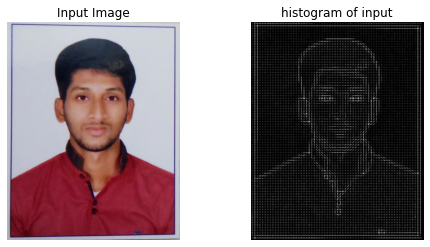

In [4]:
fd,hog_img=hog(img,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(img,cmap=plt.cm.gray)
ax1.set_title('Input Image')

hog_image_rescaled=exposure.rescale_intensity(hog_img,in_range=(0,3))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('histogram of input')
plt.show()

In [5]:
print("size of output image",fd.shape)  # 1d as vector as image is represented as Gray scale 
print("Size of input image",img.shape)  # RGB is represented as 3d matrix hence 3 colour channels

size of output image (44352,)
Size of input image (1349, 1070, 3)


**Make sure the runtime is GPU**

In [6]:
import face_recognition
from matplotlib.patches import Rectangle,Circle
import numpy as np



In [7]:
from google.colab.patches import cv2_imshow

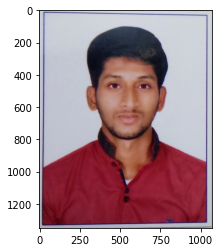

In [8]:
img=cv2.imread('/content/MYPROFESSIONALPIC.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [9]:
face_location=face_recognition.face_locations(img) # returns the face box coordinates with height and width ( 4 values ) 
print("No of face",len(face_location))

No of face 1


link to the image
https://images.app.goo.gl/PkUAGF2i6fEfa25d9

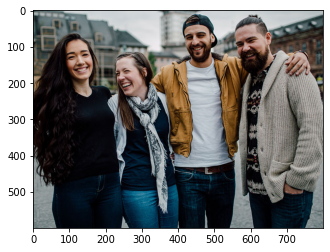

In [11]:

img_1=cv2.imread('/content/detect.jpg')
img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [12]:
face_location_1=face_recognition.face_locations(img_1) # returns the face box coordinates 
print("No of face",len(face_location_1))

No of face 4


Face is located at top:212 ,Left:146 ,Bottom:287 ,Right:221 
Face is located at top:86 ,Left:96 ,Bottom:175 ,Right:186 
Face is located at top:411 ,Left:47 ,Bottom:486 ,Right:121 
Face is located at top:533 ,Left:44 ,Bottom:641 ,Right:152 


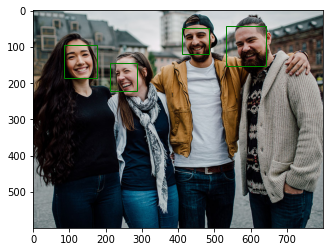

In [13]:
plt.imshow(img_1)
ax=plt.gca()

for face_location in face_location_1:

  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print("Face is located at top:{} ,Left:{} ,Bottom:{} ,Right:{} ".format(x,y,w,h))

  rect=Rectangle((x,y),w-x,h-y,fill=False,color='green')  # fill True will fill the bounded box with specified colour
  ax.add_patch(rect)
plt.show()

**Database of Images**

In [14]:
img=cv2.imread('/content/MYPROFESSIONALPIC.jpg')  # My image ( Ganesh Raj)
ganesh=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=cv2.imread('/content/harish.jpg')             # My brother
brother=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=cv2.imread('/content/dad.jpg')                # My Dad
dad=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


# Encoding the Database

In [15]:
ganesh_encoding=face_recognition.face_encodings(ganesh)[0]
brother_encoding=face_recognition.face_encodings(brother)[0]
dad_encoding=face_recognition.face_encodings(dad)[0]


In [29]:
known_face=[ganesh_encoding,brother_encoding,dad_encoding]      # Database of Verified Faces

**Test Images**

In [45]:
test_img1=cv2.imread('/content/other.jpg')
known=cv2.cvtColor(test_img1,cv2.COLOR_BGR2RGB)               # Test image 1 ( Ganesh Raj)

test_img2=cv2.imread('/content/harish.jpg')
unknown=cv2.cvtColor(test_img2,cv2.COLOR_BGR2RGB)             # Test image 2  ( Unknown ) 

# Changing to 1d vector
known_encoding=face_recognition.face_encodings(known)[0]    
unknown_encoding=face_recognition.face_encodings(unknown)[0]

test_face=[unknown_encoding,known_encoding]                   # Images to be recognized 


**Face Recognition**

Result  : [ True  True False]
-------------------------------------------------------
It's Ganesh 
Result  : [False False False]
--------Please Add to Database---------
Unknown


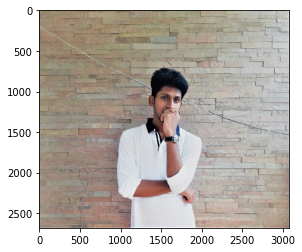

In [48]:
from scipy.spatial import distance

for test in test_face:                        # looping over images to be recognized 
  result=[]

  for known_Face in known_face:               # looping over Database to cross-verify 
    d=distance.euclidean(known_Face,test)
    result.append(d)
  threshold = 0.6
  result = np.array(result) <= threshold          # returns bool value ( True / False )

  print('Result  :',result)

  person="Unknown"

  if result[0]:
    person="It's Ganesh "
    img_1=cv2.imread('/content/ganesh1.jpg')
    img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
    plt.imshow(img_1)
    print("-------------------------------------------------------")
  elif result[1]:
    person="It's My brother"
    img_1=cv2.imread('/content/harish.jpg')
    img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
    plt.imshow(img_1)
    print("-------------------------------------------------------")
  elif result[2]:
    person="It's My dad"
    img_1=cv2.imread('/content/dad.jpg')
    img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
    plt.imshow(img_1)
    print("-------------------------------------------------------")
  elif person=='Unknown':
    print("--------Please Add to Database---------")

  print(person)
  



array([False, False, False])